### Santander Customer Satisfaction



Descriptions

- 'TARGET' column is the variable to predict. Equals '1' for unsatisfied, '0' for satisfied customers.
- Evaluation: Submissions are evaluated on area under the ROC curve.

데이터 전처리

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('train.csv', encoding = 'latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head()


dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [46]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [47]:
# 만족, 불만족 비율 확인
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [48]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [49]:
# -999999 이상치 확인
cust_df.var3.value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 63            1
 194           1
 40            1
 57            1
 87            1
Name: count, Length: 208, dtype: int64

In [50]:
# var3 이상치 변환
cust_df['var3'].replace(-999999, 2, inplace = True)

# ID column drop
cust_df.drop('ID', axis = 1, inplace = True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape: {0}'.format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [ ]:
# 학습 데이터 셋과 테스트 데이터 셋으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 42)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape: {0}, 테스트 세트 Shape: {1}'.format(X_train.shape, X_test.shape))

print('\n학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape: (60816, 369), 테스트 세트 Shape: (15204, 369)

학습 세트 레이블 값 분포 비율
TARGET
0    0.96052
1    0.03948
Name: count, dtype: float64

테스트 세트 레이블 값 분포 비율
TARGET
0    0.960076
1    0.039924
Name: count, dtype: float64


In [52]:
# X_train, y_train 다시 학습과 검증 데이터 세트로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

XGBoost
> ROC AUC: 0.8398
> 하이퍼 파라미터 ROC AUC: 0.8203

In [53]:
# XGBoost 모델 학습과 하이퍼 파라미터 튜닝
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(
    n_estimators = 500, 
    learning_rate = 0.05, 
    random_state = 42,
    eval_metric = 'auc',
    early_stopping_rounds = 100
)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_val, y_val)], verbose = True)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81567
[1]	validation_0-auc:0.82028
[2]	validation_0-auc:0.82190
[3]	validation_0-auc:0.82426
[4]	validation_0-auc:0.82493
[5]	validation_0-auc:0.82623
[6]	validation_0-auc:0.82689
[7]	validation_0-auc:0.82746
[8]	validation_0-auc:0.82845
[9]	validation_0-auc:0.82952
[10]	validation_0-auc:0.82967
[11]	validation_0-auc:0.82948
[12]	validation_0-auc:0.82976
[13]	validation_0-auc:0.82994
[14]	validation_0-auc:0.83012
[15]	validation_0-auc:0.83028
[16]	validation_0-auc:0.83076
[17]	validation_0-auc:0.83132
[18]	validation_0-auc:0.83217
[19]	validation_0-auc:0.83244
[20]	validation_0-auc:0.83251
[21]	validation_0-auc:0.83268
[22]	validation_0-auc:0.83274
[23]	validation_0-auc:0.83271
[24]	validation_0-auc:0.83270
[25]	validation_0-auc:0.83285
[26]	validation_0-auc:0.83340
[27]	validation_0-auc:0.83316
[28]	validation_0-auc:0.83352
[29]	validation_0-auc:0.83410
[30]	validation_0-auc:0.83379
[31]	validation_0-auc:0.83377
[32]	validation_0-auc:0.83400
[33]	validation_0-au

In [54]:
# HyperOpt 통해 베이지안 최적화 기반으로 하이퍼 파라미터 튜닝 진행
from hyperopt import hp

# max_depth는 5에서 15까지 1 간격으로, min_child_weight는 1에서 6까지 1 간격으로
# colsample_bytree 는 0.5에서 0.95 사이, learning_rate 는 0.01에서 0.2 사이 정규 분포된 값으로 검색

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [57]:
# 목적 함수 생성
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin() 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1 * roc_auc 평균 값 반환.
def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators = 100,
        max_depth = int(search_space['max_depth']),
        min_child_weight = int(search_space['min_child_weight']),
        colsample_bytree = search_space['colsample_bytree'],
        learning_rate = search_space['learning_rate'],
        early_stopping_rounds = 30,
        eval_metric = 'auc'
        )

    #3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits = 3)

    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정. 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=True)

        # 1로 예측한 확률값 추출 후 roc auc 계산 후 평균 roc auc 계산 위해 list에 결과값 추가.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

        # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
        # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.

best = fmin(
    fn = objective_func,
    space = xgb_search_space,
    algo = tpe.suggest,
    max_evals = 50, #최대 반복 횟수 지정
    trials = trials, rstate = np.random.default_rng(seed = 42))

print('best: ', best)

# best:  {
#     'colsample_bytree': np.float64(0.5086395909748219), 
#     'learning_rate': np.float64(0.10852513234800168), 
#     'max_depth': np.float64(5.0), 
#     'min_child_weight': np.float64(6.0)
#     }

[0]	validation_0-auc:0.73966                          
[1]	validation_0-auc:0.74997                          
[2]	validation_0-auc:0.75622                          
[3]	validation_0-auc:0.78850                          
[4]	validation_0-auc:0.78842                          
[5]	validation_0-auc:0.79974                          
[6]	validation_0-auc:0.80663                          
[7]	validation_0-auc:0.81082                          
[8]	validation_0-auc:0.80851                          
[9]	validation_0-auc:0.81156                          
[10]	validation_0-auc:0.81078                         
[11]	validation_0-auc:0.81343                         
[12]	validation_0-auc:0.81493                         
[13]	validation_0-auc:0.81325                         
[14]	validation_0-auc:0.81460                         
[15]	validation_0-auc:0.81517                         
[16]	validation_0-auc:0.81682                         
[17]	validation_0-auc:0.81639                         
[18]	valid

In [59]:
# n_estimators를 500 으로 증가 후 최적으로 찾은 하이퍼 파라미터 기반 학습 및 예측 진행
xgb_clf = XGBClassifier(
    n_estimators = 500,
    learning_rate = round(best['learning_rate'], 5),
    max_depth = int(best['max_depth']),
    min_child_weight = int(best['min_child_weight']),
    colsample_bytree = round(best['colsample_bytree'],5),
    eval_metric = 'auc',
    early_stopping_rounds = 100
    )

# 학습 수행
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr)], verbose=True)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.75612
[1]	validation_0-auc:0.77272
[2]	validation_0-auc:0.77652
[3]	validation_0-auc:0.82383
[4]	validation_0-auc:0.82427
[5]	validation_0-auc:0.83286
[6]	validation_0-auc:0.83679
[7]	validation_0-auc:0.83654
[8]	validation_0-auc:0.83777
[9]	validation_0-auc:0.84217
[10]	validation_0-auc:0.84317
[11]	validation_0-auc:0.84710
[12]	validation_0-auc:0.84776
[13]	validation_0-auc:0.84826
[14]	validation_0-auc:0.84854
[15]	validation_0-auc:0.84922
[16]	validation_0-auc:0.84988
[17]	validation_0-auc:0.85078
[18]	validation_0-auc:0.85315
[19]	validation_0-auc:0.85553
[20]	validation_0-auc:0.85743
[21]	validation_0-auc:0.85815
[22]	validation_0-auc:0.85862
[23]	validation_0-auc:0.85954
[24]	validation_0-auc:0.86111
[25]	validation_0-auc:0.86237
[26]	validation_0-auc:0.86290
[27]	validation_0-auc:0.86411
[28]	validation_0-auc:0.86478
[29]	validation_0-auc:0.86473
[30]	validation_0-auc:0.86497
[31]	validation_0-auc:0.86577
[32]	validation_0-auc:0.86654
[33]	validation_0-au

ROC AUC 가 더 낮아짐: local minimum에 빠지거나, 데이터 노이즈나 샘플링으로 인해 분산 발생 가능성.
> n_estimators 도 search_space 추가 ('n_estimators': hp.quniform('n_estimators', 100, 1000, 50))

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

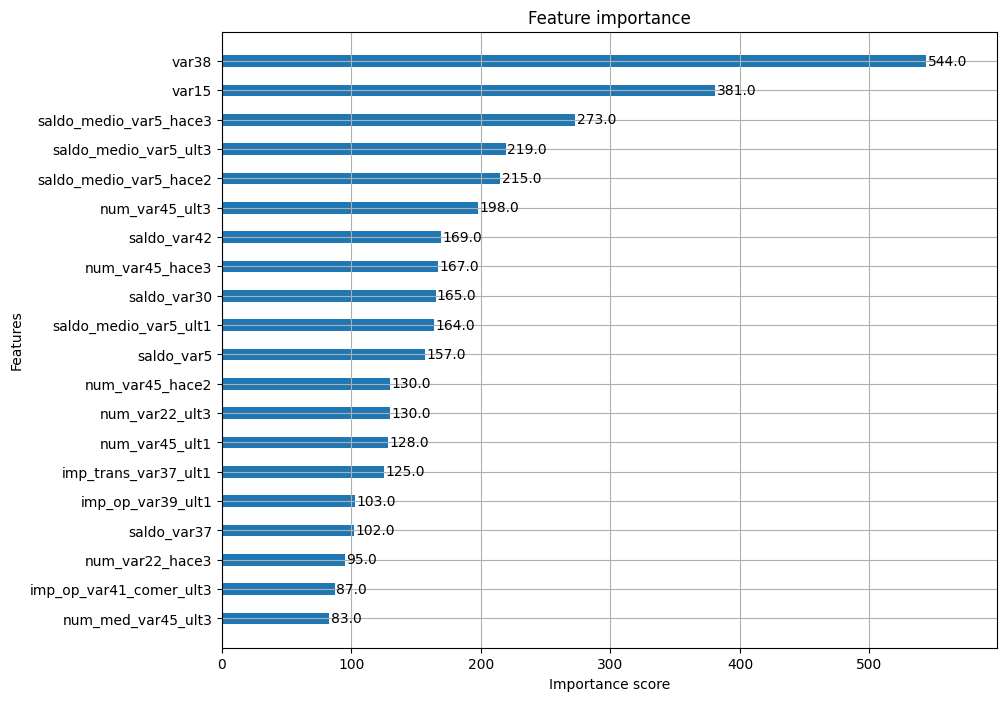

In [60]:
# 각 피쳐 중요도 확인
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

LightBGM 
> ROC AUC: 0.833828
> 하이퍼 파라미터 ROC AUC: 0.8203

In [84]:
from lightgbm import LGBMClassifier, early_stopping

lgbm_clf = LGBMClassifier(n_estimators = 500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(
    X_tr, y_tr, 
    eval_set = eval_set,
    eval_metric = 'auc',
    callbacks = [early_stopping(100, verbose = True)]
    )

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1592, number of negative: 38952
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13244
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 247
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039266 -> initscore=-3.197339
[LightGBM] [Info] Start training from score -3.197339
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	training's auc: 0.912783	training's binary_logloss: 0.111723	valid_1's auc: 0.839947	valid_1's binary_logloss: 0.134218
ROC AUC: 0.833828


In [86]:
# lbgm search space 생성
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 목적 함수 생성
def objective_func_lgbm(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators = 100,
        num_leaves = int(search_space['num_leaves']),
        max_depth = int(search_space['max_depth']),
        min_child_samples = int(search_space['min_child_samples']),
        subsample = search_space['subsample'],
        learning_rate = search_space['learning_rate']
    )

    # 3개 k-fold 방식으로 평가된 roc_auc 지표 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits = 3)

    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping 30회 설정
        lgbm_clf.fit(
            X_tr, y_tr, 
            callbacks = [early_stopping(30)], 
            eval_metric = 'auc', 
            eval_set = [(X_val, y_val)]
            )

        # 1로 예측한 확률값 추출 후 roc auc 계산 후 평균 roc auc 계산 위해 list에 결과값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출.
best = fmin(
    fn = objective_func_lgbm,
    space = lgbm_search_space,
    algo = tpe.suggest,
    max_evals = 50, # 최대 반복 횟수 지정
    trials = trials, 
    rstate = np.random.default_rng(seed = 42)
)

print('best: ', best)

# best:  {
#     'learning_rate': np.float64(0.07425146048412073), 
#     'max_depth': np.float64(121.0), 
#     'min_child_samples': np.float64(71.0), 
#     'num_leaves': np.float64(35.0), 
#     'subsample': np.float64(0.8508711263984445)
#     }

[LightGBM] [Info] Number of positive: 1617, number of negative: 38927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12794                    
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039883 -> initscore=-3.181116
[LightGBM] [Info] Start training from score -3.181116 
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:                    
[17]	valid_0's auc: 0.818222	valid_0's binary_logloss: 0.136129
[LightGBM] [Info] Number of positive: 1593, number of negative: 38951
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if m

In [88]:
lgbm_clf = LGBMClassifier(
    n_estimators = 500,
    num_leaves = int(best['num_leaves']),
    max_depth = int(best['max_depth']),
    min_child_samples = int(best['min_child_samples']),
    subsample = round(best['subsample'], 5),
    learning_rate = round(best['learning_rate'], 5)
)

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
lgbm_clf.fit(
    X_tr, y_tr, 
    callbacks = [early_stopping(100)],
    eval_metric = 'auc',
    eval_set = [(X_val, y_val)]
    )

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1592, number of negative: 38952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12884
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 197
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039266 -> initscore=-3.197339
[LightGBM] [Info] Start training from score -3.197339
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.84149	valid_0's binary_logloss: 0.134145
ROC AUC: 0.8203


In [93]:
import xgboost
print(xgboost.__version__)

3.0.4


In [94]:
import lightgbm
print(lightgbm.__version__)

4.6.0
